# This notebook reproduces all the figures included in the manuscript
# Kumar, J., Coffin, A. W., Baffaut, C., Ponce-Campos, G., Witthaus, L., and Hargrove, W. W. (2023) "Quantitative Representativeness and Constituency of the Long-Term Agroecosystem Research Network, and Analysis of Complementarity with Other Existing Ecological Networks", Environmental Management (in review)
# Author: Jitendra (Jitu) Kumar 
# Contact: kumarj@ornl.gov

In [1]:
import pandas as pd 
import plotly
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request 
from pyensae.graphhelper import Corrplot
import xarray as xr
import rioxarray as rio
import cartopy.crs as ccrs
from os import path

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [ ]:
# Zenodo base URL for doi: https://doi.org/10.5281/zenodo.7106385
zenodo_base="https://zenodo.org/record/7106385/files/"

# Data products included in doi: https://doi.org/10.5281/zenodo.7106385 were processed and summaary files, in ASCII format, were created to prepare the plots in the paper. 
# All data files are included in '/data' directory of the code repo

In [25]:
# List LTAR sites
ltar_sites_short=['ABS-UF', 'CMRB', 'CPER', 'ECB', 'GB', 'GACP', 'JER', 'KBS', 'LCB', 'LMRB', 'NP', 'PRHPA', 'CAF', 'SP', 'TG', 'UCB', 'UMRB', 'WGEW']
# Create colors for LTAR sites.. these are same colors we are using for constituenc maps in QGIS
ltar_colors=np.array([[143,79,168],              #Archbold-University of Florida
             [131,161,220],             #Central Mississippi River Basin
             [73,171,94],               #Central Plains Experimental Range
             [170,86,80],               #Eastern Corn Belt
             [25,163,190],              #Great Basin
             [118,211,72],              #Gulf Atlantic Coastal Plain
             [181,80,55],               #Jornada Experimental Range
             [109,180,191],             #Kellogg Biological Station
             [206,108,72],              #Lower Chesapeake Bay
             [249,173,101],             #Lower Mississippi River Basin
             [244,187,64],              #Northern Plains
             [188,130,241],             #Platte River High Plains Aquifer
             [116,22,239],              #R.J. Cook Agronomy Farm
             [132,69,43],               #Southern Plains
             [202,204,96],              #Texas Gulf
             [250,150,190],             #Upper Chesapeake Bay
             [41,80,252],               #Upper Mississippi River Basin
             [106,158,10]])              #Walnut Gulch Experimental Watershed
ltar_colors = ltar_colors/255.0

# Networks studied
network_code=['LTAR', 'NEON', 'LTER']

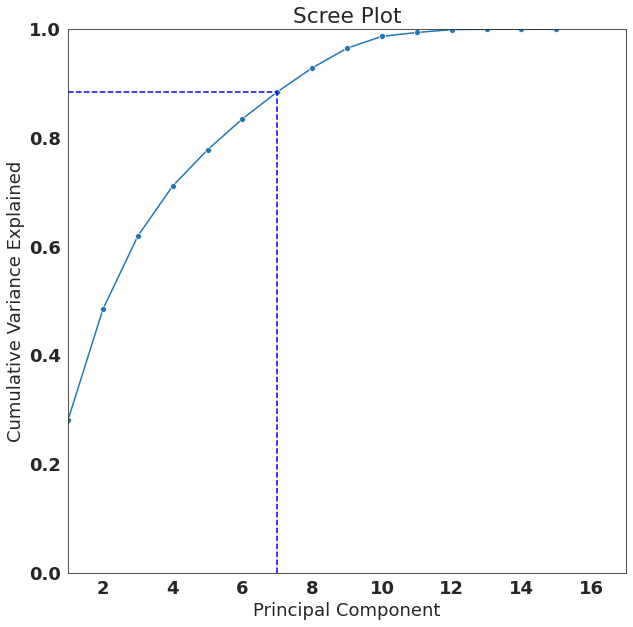

In [2]:
# Figure 2a
# read data
explained_variance=np.loadtxt('data/pca/explained_variance_ratio.conus_ltar_v5')

# scree plot
sns.set_style("white")
plt.figure(figsize=(10,10))
PC_values = np.arange(len(explained_variance)) + 1
sns.lineplot(x=PC_values, y=explained_variance.cumsum(), marker='o') #, 'o-', linewidth=2, color='blue')
plt.axhline(y=explained_variance.cumsum()[6], xmin=0, xmax=6/16, color='blue', linestyle='--')
plt.axvline(x=7, ymin=0, ymax=explained_variance.cumsum()[6], color='blue', linestyle='--')
plt.title('Scree Plot')
plt.ylim([0,1])
plt.xlim([1,17])
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('screeplot_v5.png', dpi=300)

<Figure size 432x288 with 0 Axes>

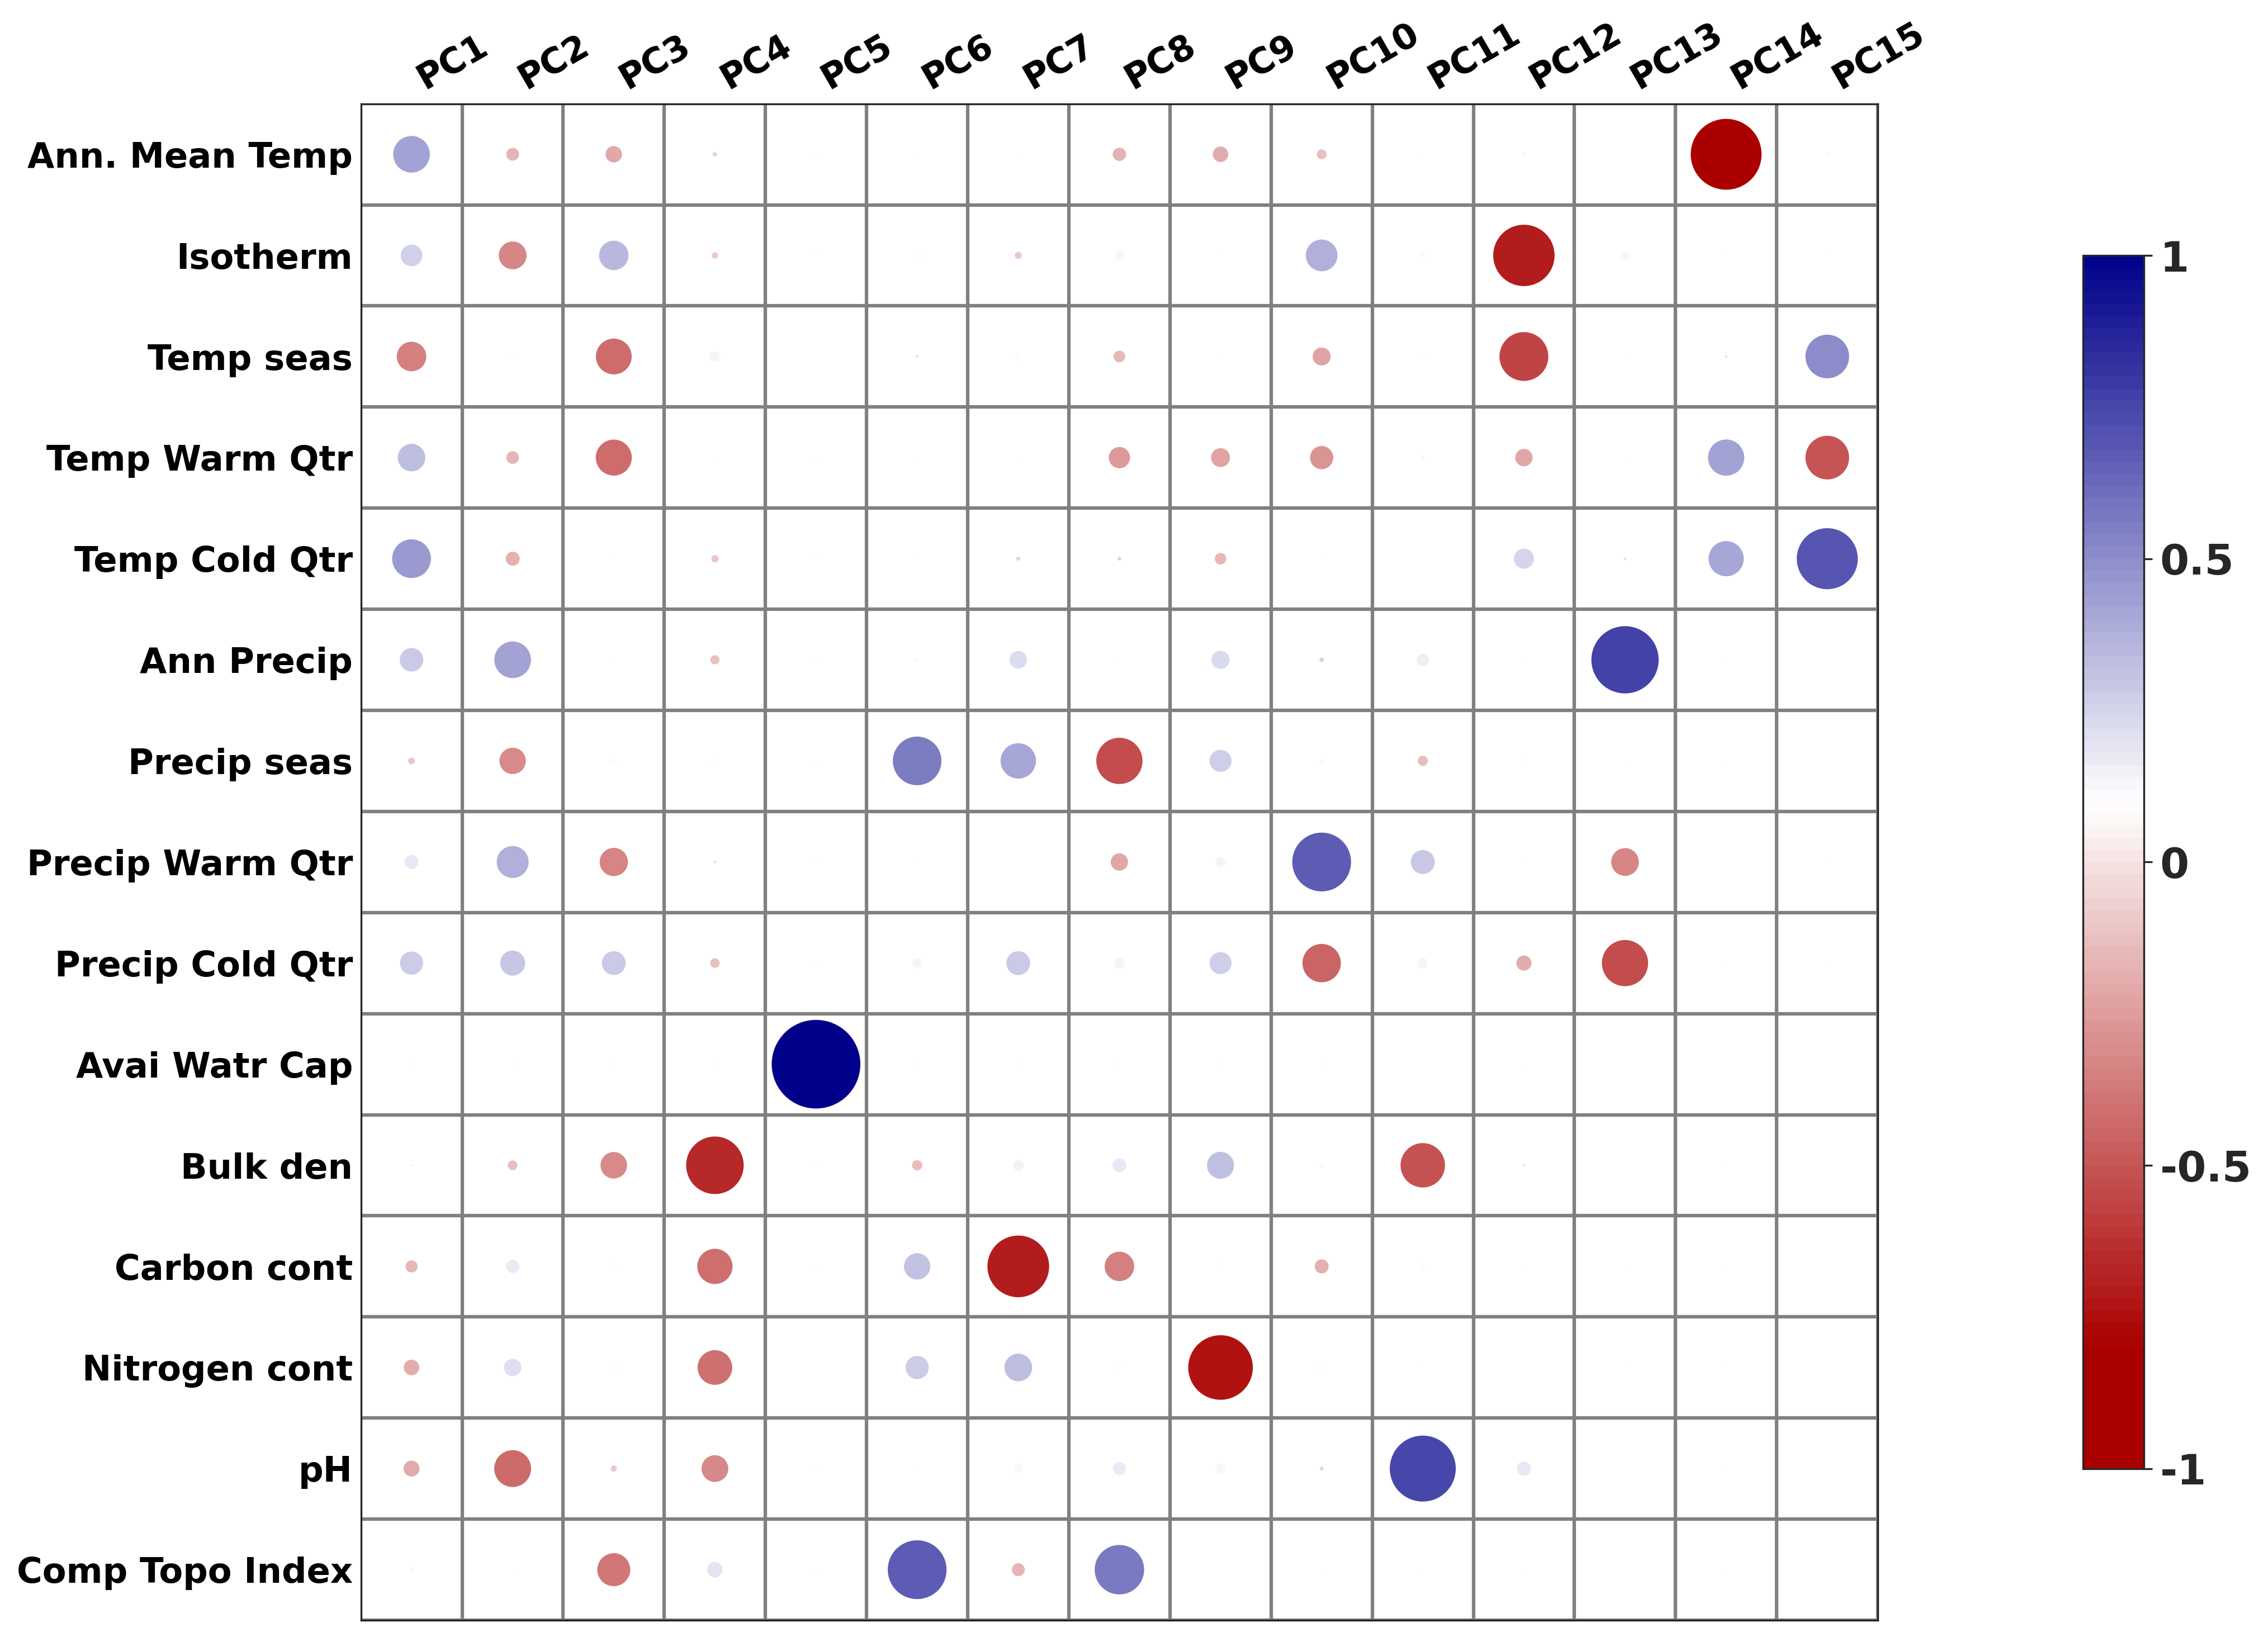

In [4]:
# Figure 2b
# read data
eigenvectors=pd.read_csv('data/pca/components.conus_ltar_v5', header=None, delimiter=" ")

# corrplot 
mfig, ax = plt.subplots(1,1, figsize=(25,10), dpi=300, facecolor='white')
ax.set_aspect(1)

c = Corrplot(eigenvectors)
ytick_labels=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15"]
xtick_labels=["Ann. Mean Temp", "Isotherm", "Temp seas", "Temp Warm Qtr", "Temp Cold Qtr", "Ann Precip", "Precip seas", "Precip Warm Qtr", "Precip Cold Qtr", "Avai Watr Cap", "Bulk den", "Carbon cont", "Nitrogen cont", "pH", "Comp Topo Index"]

ax = plt.subplot(1, 1, 1, aspect='equal', facecolor='white')
c = Corrplot(eigenvectors)
cplot = c.plot(order_method=None, ax=ax, method='circle')
ax.set_xticklabels(ytick_labels)
ax.set_yticklabels(xtick_labels)
mfig.savefig("eigen_vectors_corrplot_v5.png", dpi=300)

/tmp/ipykernel_1225/898771564.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True)['code'])
/tmp/ipykernel_1225/898771564.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True)['code'])
/tmp/ipykernel_1225/898771564.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True)['code'])


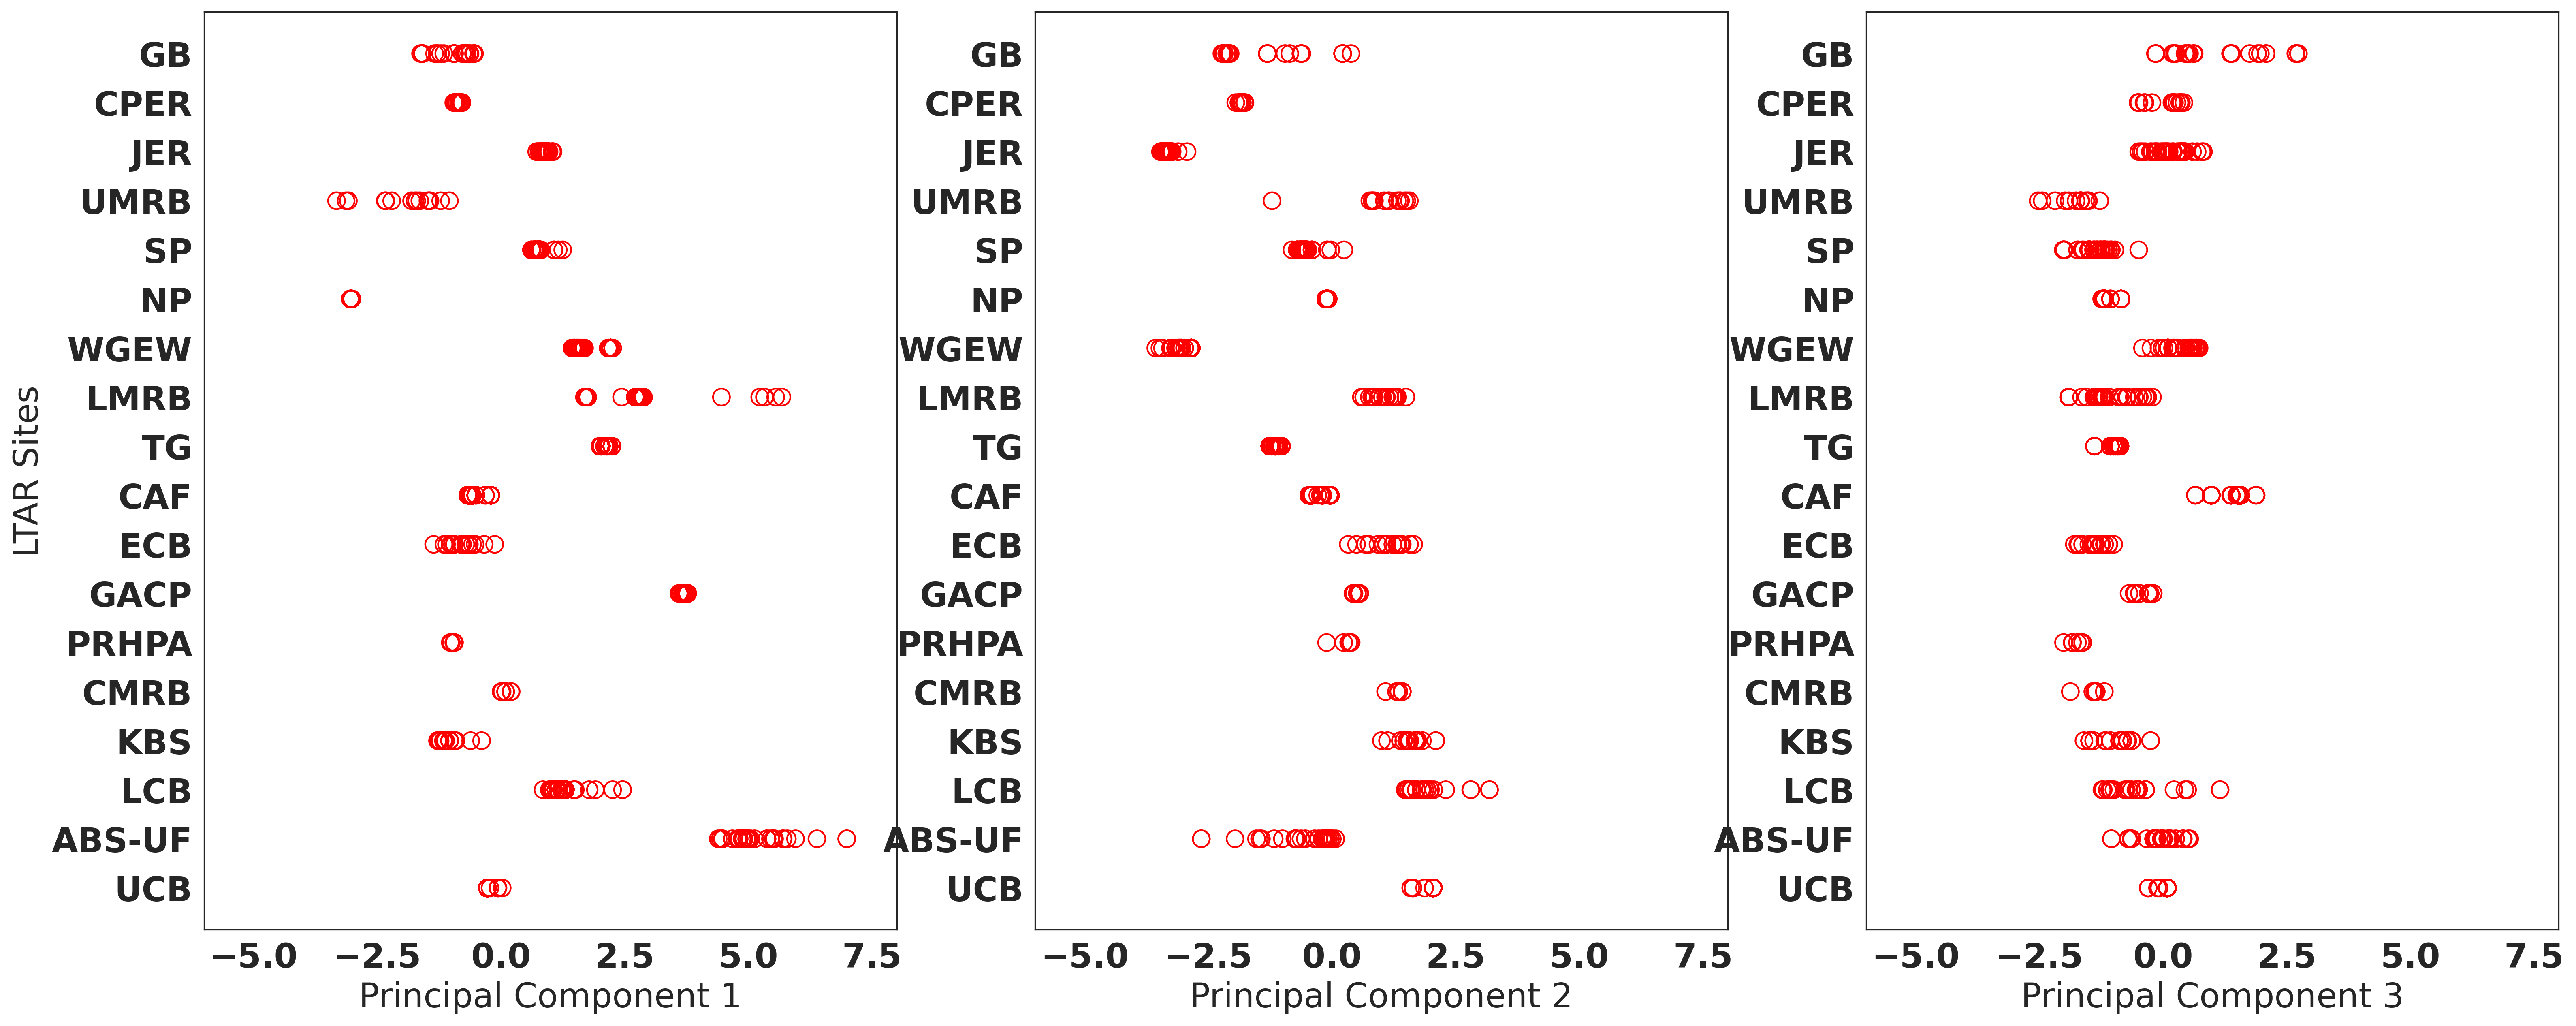

In [8]:
# Figure 3
# Plot PC1,2,3 distrbutions across LTAR site polygons 

# create a figure object 
mfig, ax = plt.subplots(1,3, figsize=(25,10), dpi=300)
opfilename="ltar_v5_7pcs_pca_all_polygons.png"

##################
# read univariate statistics within each LTAR constituency data
univar_ltar_wl = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_workinglands.univar", delimiter="|")

# read the areas under each LTAR constituency 
area_ltar_wl = pd.read_csv("data/representativeness/ltar_v5_7pcs_workinglands.area", delimiter=",") #, header=None, names=['id', 'code', 'name', 'area'])
univar_ltar_wl['area'] = area_ltar_wl['area']

## Add experimental polygons as scatter
# read 7PCs data at LTAR sites
ltar_7pcs = pd.read_csv('data/pca/conus_ltar_v5_7pcs.vect.out', header=None, delimiter=" ", names=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])

# we have 1529 centroids for 18 LTAR sites.. so read the LTAR site mapping
# cat1, cat2 are identical and experimental boundary number, ltar1 and ltar2 are associated ltar site number
ltar_site_mapping = pd.read_csv('data/ltar_10142020.recode', header=None, delimiter=':', names=["cat1", "cat2", "ltar1", "ltar2"])

# add experimental boundary and site ids to the pcs
ltar_7pcs['exp_bound'] = ltar_site_mapping['cat1']
ltar_7pcs['code'] = ltar_site_mapping['ltar1']

# we will have to do this in a loop
for s in range(0,18):
    # find the site id from area sorted list 
    id = univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True).zone.iloc[s]
   
    # plot this site data as scatter
    ax[0].scatter(y=len(ltar_7pcs[ltar_7pcs.code == id])*univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).code.iloc[s].split(), x=ltar_7pcs[ltar_7pcs.code == id]["PC1"], s=100, edgecolor="red", facecolor='none')
    ax[1].scatter(y=len(ltar_7pcs[ltar_7pcs.code == id])*univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).code.iloc[s].split(), x=ltar_7pcs[ltar_7pcs.code == id]["PC2"], s=100, edgecolor="red", facecolor='none')
    ax[2].scatter(y=len(ltar_7pcs[ltar_7pcs.code == id])*univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).code.iloc[s].split(), x=ltar_7pcs[ltar_7pcs.code == id]["PC3"], s=100, edgecolor="red", facecolor='none')

##################

# PC1                                

ax[0].set_xlabel("Principal Component 1")
ax[0].set_xlim([-6,8])
ax[0].set_ylabel("LTAR Sites")
ax[0].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True)['code'])
ax[0].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[0].patch.set_visible(False)  # prevents ax1 from hiding ax2

##################
# PC2 

ax[1].set_xlabel("Principal Component 2")
ax[1].set_xlim([-6,8])
ax[1].set_ylabel("")
ax[1].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True)['code'])
ax[1].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[1].patch.set_visible(False)  # prevents ax1 from hiding ax2

##################
# PC3

ax[2].set_xlabel("Principal Component 3")
ax[2].set_xlim([-6,8])
ax[2].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=True, ignore_index=True)['code'])
ax[2].set_ylabel("")
ax[2].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[2].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################

plt.savefig(opfilename, transparent=False)


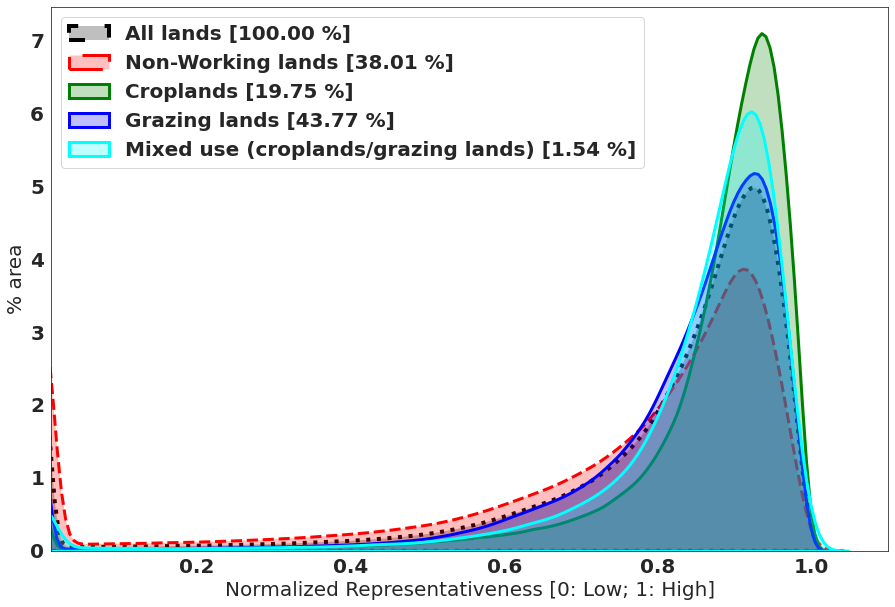

In [9]:
# Figure 4
# read the data 
# This file is large and cannot fit into git repo 
ltar_data = pd.read_csv('data/representativeness/ltar_neon_lter_v5_7pcs_const_detailednomasks.out', header=None, names=['ltar_rep', 'ltar_neon_rep', 'ltar_neon_lter_rep', 'ltar_const', 'masks', 'pc1', 'pc2', 'pc3'])
# Plot national scale density plots
plt.figure(figsize=(15,10))
nall=len(ltar_data.ltar_rep)
nforest=len(ltar_data[ltar_data.masks.isin([0])])
ncropland=len(ltar_data[ltar_data.masks.isin([1,3,5,7])])
ngrazing=len(ltar_data[ltar_data.masks.isin([2,3,4,5,6,7])])
nboth=len(ltar_data[ltar_data.masks.isin([3,5,7])])
fig=sns.kdeplot(ltar_data.ltar_rep, color="black", linestyle=':', linewidth=4, shade=True, label='All lands [%0.2f %%]'%(nall*100.0/nall))
fig=sns.kdeplot(ltar_data[ltar_data.masks.isin([0])].ltar_rep, color="red", linestyle='--', linewidth=3, shade=True, label='Non-Working lands [%0.2f %%]'%((nforest*100.0)/nall))
fig=sns.kdeplot(ltar_data[ltar_data.masks.isin([1,3,5,7])].ltar_rep, color="green", linewidth=3, shade=True, label='Croplands [%0.2f %%]'%((ncropland*100.0)/nall))
fig=sns.kdeplot(ltar_data[ltar_data.masks.isin([2,3,4,5,6,7])].ltar_rep, color="blue", linewidth=3, shade=True, label='Grazing lands [%0.2f %%]'%((ngrazing*100.0)/nall))
fig=sns.kdeplot(ltar_data[ltar_data.masks.isin([3,5,7])].ltar_rep, color="cyan", linewidth=3, shade=True, label='Mixed use (croplands/grazing lands) [%0.2f %%]'%((nboth*100.0)/nall))

plt.xlabel("Normalized Representativeness [0: Low; 1: High]")
plt.ylabel("% area")
plt.xlim([0.01,1.1])
plt.legend(loc='upper left')
plt.savefig("ltar_v5_7pcs_national_representativeness.png", dpi=300)

Text(0.5, 1.0, 'LTAR Representativeness')

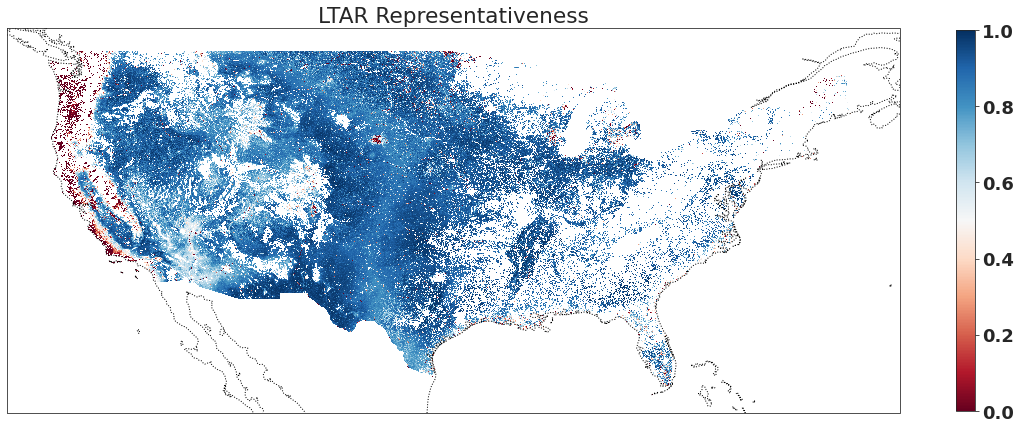

In [17]:
# Figure 5a
# Normalized representativeness of LTAR network. Calculated for all lands
# Read representativeness map: conus_ltar_constituency_workinglands.tif
if path.isfile("data/representativeness/conus_ltar_representativeness_workinglands.tif"):
    representativeness_map = rio.open_rasterio("data/representativeness/conus_ltar_representativeness_workinglands.tif", engine='rasterio', masked=True)
else:
    urllib.request.urlretrieve("https://zenodo.org/record/7106385/files/conus_ltar_representativeness_workinglands.tif", "data/representativeness/conus_ltar_representativeness_workinglands.tif")
    representativeness_map = rio.open_rasterio("data/representativeness/conus_ltar_representativeness_workinglands.tif", engine='rasterio', masked=True)
# read the working land mask
workingland_mask = rio.open_rasterio("data/croplands_grazinglands_with_PastureHay_Wetlands_1km.tif", engine='rasterio', masked=True).astype(int)

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
r=representativeness_map.where(workingland_mask >=1).plot(cmap='RdBu', vmax=0, vmin=1, add_colorbar=False)
ax.coastlines(color="black", linestyle="dotted")
plt.colorbar(r, shrink=0.7)
plt.title("LTAR Representativeness")

Text(0.5, 1.0, 'LTAR Constituency Map')

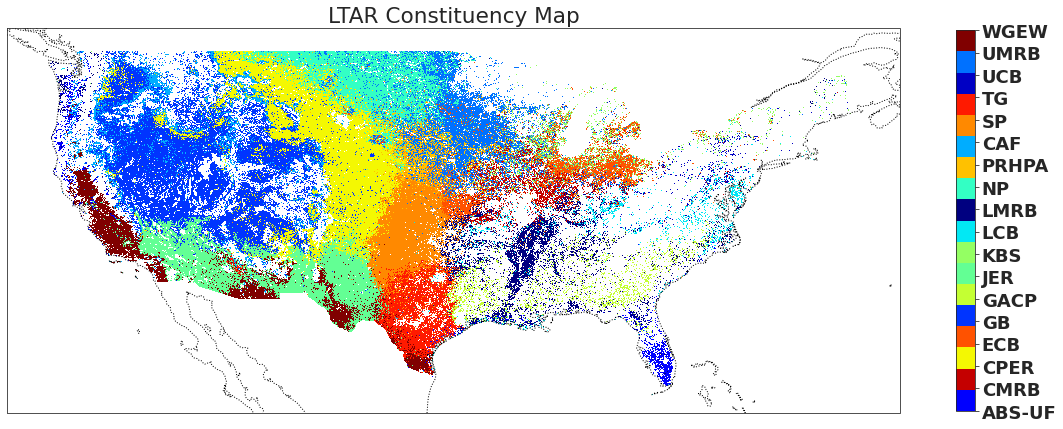

In [21]:
# Figure 5b
# LTAR network constituency
# Read working land mask: conus_ltar_representativeness_workinglands.tif
if path.isfile("data/representativeness/conus_ltar_constituency_workinglands.tif"):
    constituency_map = rio.open_rasterio("data/representativeness/conus_ltar_constituency_workinglands.tif", engine='rasterio', masked=True)
else:
    urllib.request.urlretrieve("https://zenodo.org/record/7106385/files/conus_ltar_constituency_workinglands.tif", "data/representativeness/conus_ltar_constituency_workinglands.tif")
    constituency_map = rio.open_rasterio("data/representativeness/conus_ltar_constituency_workinglands.tif", engine='rasterio', masked=True)

######### COLORS ###############
vals = np.linspace(0,1,18)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))
################################

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
c=constituency_map.where(workingland_mask >=1).plot(cmap=cmap, vmax=1, vmin=18, add_colorbar=False)
ax.coastlines(color="black", linestyle="dotted")
cbar = plt.colorbar(c, ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], shrink=0.7)
cbar.ax.set_yticklabels(ltar_sites_short) 
plt.title("LTAR Constituency Map")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


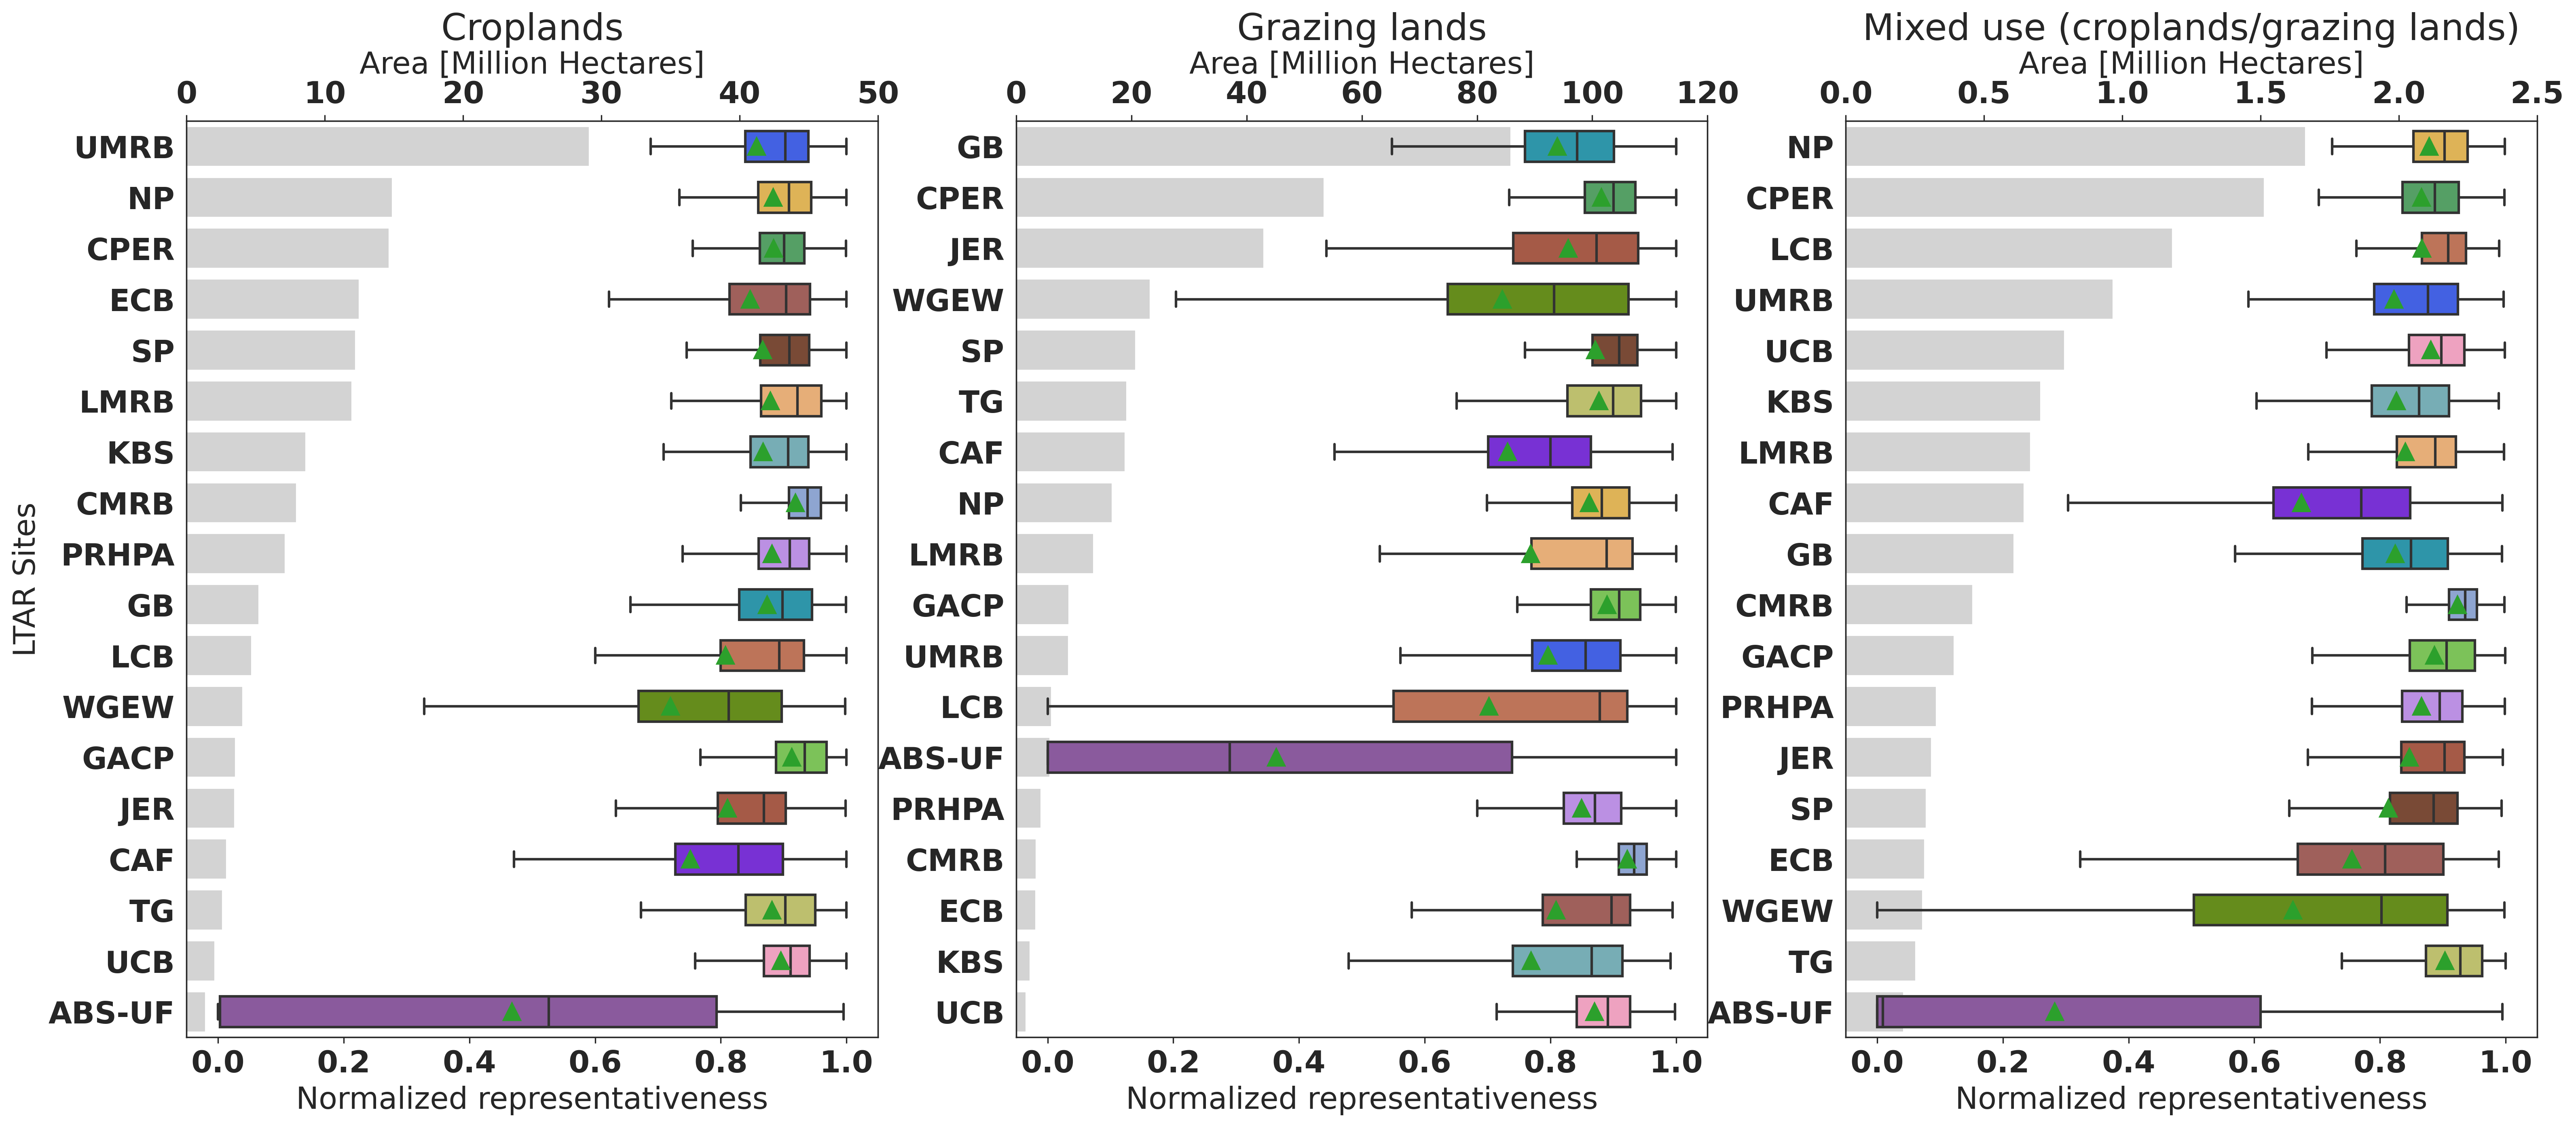

In [22]:
# Figure 6
# Plot representativness distribution and constituency areas across LTAR for various masks

# create a figure object 
mfig, ax = plt.subplots(1,3, figsize=(25,10), dpi=300)
opfilename="ltar_v5_7pcs_netrep_all_lands_boxplot_area.png"



#######################################################################################################
# croplands 
# read univar data
univar_ltar_cl = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_croplands.univar", delimiter="|")
# read the areas
area_ltar_cl = pd.read_csv("data/representativeness/ltar_v5_7pcs_croplands.area", delimiter=",") #, header=None, names=['id', 'code', 'name', 'area'])
univar_ltar_cl['area'] = area_ltar_cl['area']
                                
ax2=ax[0].twiny()
ax2.set_ylabel("Area [Million Hectares]")
ax2.barh(univar_ltar_cl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'], univar_ltar_cl.sort_values(by=['area'], ascending=False, ignore_index=True)['area']/(10000.0*1e6), color='lightgray')

sns.boxplot(y="ltar_const", x="ltar_rep", data=ltar_data[ltar_data.masks.isin([1,3,5,7])], width=.6, orient="h", fliersize=0, order=univar_ltar_cl.sort_values(by=['area'], ascending=False).index+1, showmeans=True, meanprops={"markersize":"10"}, palette=ltar_colors.take(univar_ltar_cl.sort_values(by=['area'], ascending=False).index,0), ax=ax[0])

ax[0].set_xlabel("Normalized representativeness")
ax2.set_xlabel("Area [Million Hectares]")
ax2.set_xlim([0,50])
ax[0].set_ylabel("LTAR Sites")
ax[0].set_yticklabels(univar_ltar_cl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'])
ax[0].set_title("Croplands")
ax[0].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[0].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################

#######################################################################################################
# grazing lands 
# read univar data
univar_ltar_gl = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_grazinglands.univar", delimiter="|")
# read the areas
area_ltar_gl = pd.read_csv("data/representativeness/ltar_v5_7pcs_grazinglands.area") #, delimiter=",", header=None, names=['id', 'code', 'name', 'area'])
univar_ltar_gl['area'] = area_ltar_gl['area']
                                
ax2=ax[1].twiny()
ax2.set_ylabel("Area [Million Hectares]")
ax2.barh(univar_ltar_gl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'], univar_ltar_gl.sort_values(by=['area'], ascending=False, ignore_index=True)['area']/(10000.0*1e6), color='lightgray')

sns.boxplot(y="ltar_const", x="ltar_rep", data=ltar_data[ltar_data.masks.isin([2,3,4,5,6,7])], width=.6, orient="h", fliersize=0, order=univar_ltar_gl.sort_values(by=['area'], ascending=False).index+1, showmeans=True, meanprops={"markersize":"10"}, palette=ltar_colors.take(univar_ltar_gl.sort_values(by=['area'], ascending=False).index,0), ax=ax[1])

ax[1].set_xlabel("Normalized representativeness")
ax2.set_xlabel("Area [Million Hectares]")
ax2.set_xlim([0,120])
ax[1].set_ylabel("")
ax[1].set_yticklabels(univar_ltar_gl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'])
ax[1].set_title("Grazing lands")
ax[1].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[1].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################


#######################################################################################################
# Mixed use (croplands/grazing lands) 
# read univar data
univar_ltar_is = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_mixeduse.univar", delimiter="|")
# read the areas
area_ltar_is = pd.read_csv("data/representativeness/ltar_v5_7pcs_mixeduse.area", delimiter=",")
univar_ltar_is['area'] = area_ltar_is['area']
                                
ax2=ax[2].twiny()
ax2.set_ylabel("Area [Million Hectares]")
ax2.barh(univar_ltar_is.sort_values(by=['area'], ascending=False, ignore_index=True)['code'], univar_ltar_is.sort_values(by=['area'], ascending=False, ignore_index=True)['area']/(10000.0*1e6), color='lightgray')

## ORDER BY AREA
sns.boxplot(y="ltar_const", x="ltar_rep", data=ltar_data[ltar_data.masks.isin([3,5,7])], width=.6, orient="h", fliersize=0, order=univar_ltar_is.sort_values(by=['area'], ascending=False).index+1, showmeans=True, meanprops={"markersize":"10"}, palette=ltar_colors.take(univar_ltar_is.sort_values(by=['area'], ascending=False).index,0), ax=ax[2])

ax[2].set_xlabel("Normalized representativeness")
ax2.set_xlabel("Area [Million Hectares]")
ax2.set_xlim([0,2.5])
ax[2].set_yticklabels(univar_ltar_is.sort_values(by=['area'], ascending=False, ignore_index=True)['code'])
ax[2].set_ylabel("")
ax[2].set_title("Mixed use (croplands/grazing lands)")
ax[2].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[2].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################



plt.savefig(opfilename, transparent=False)


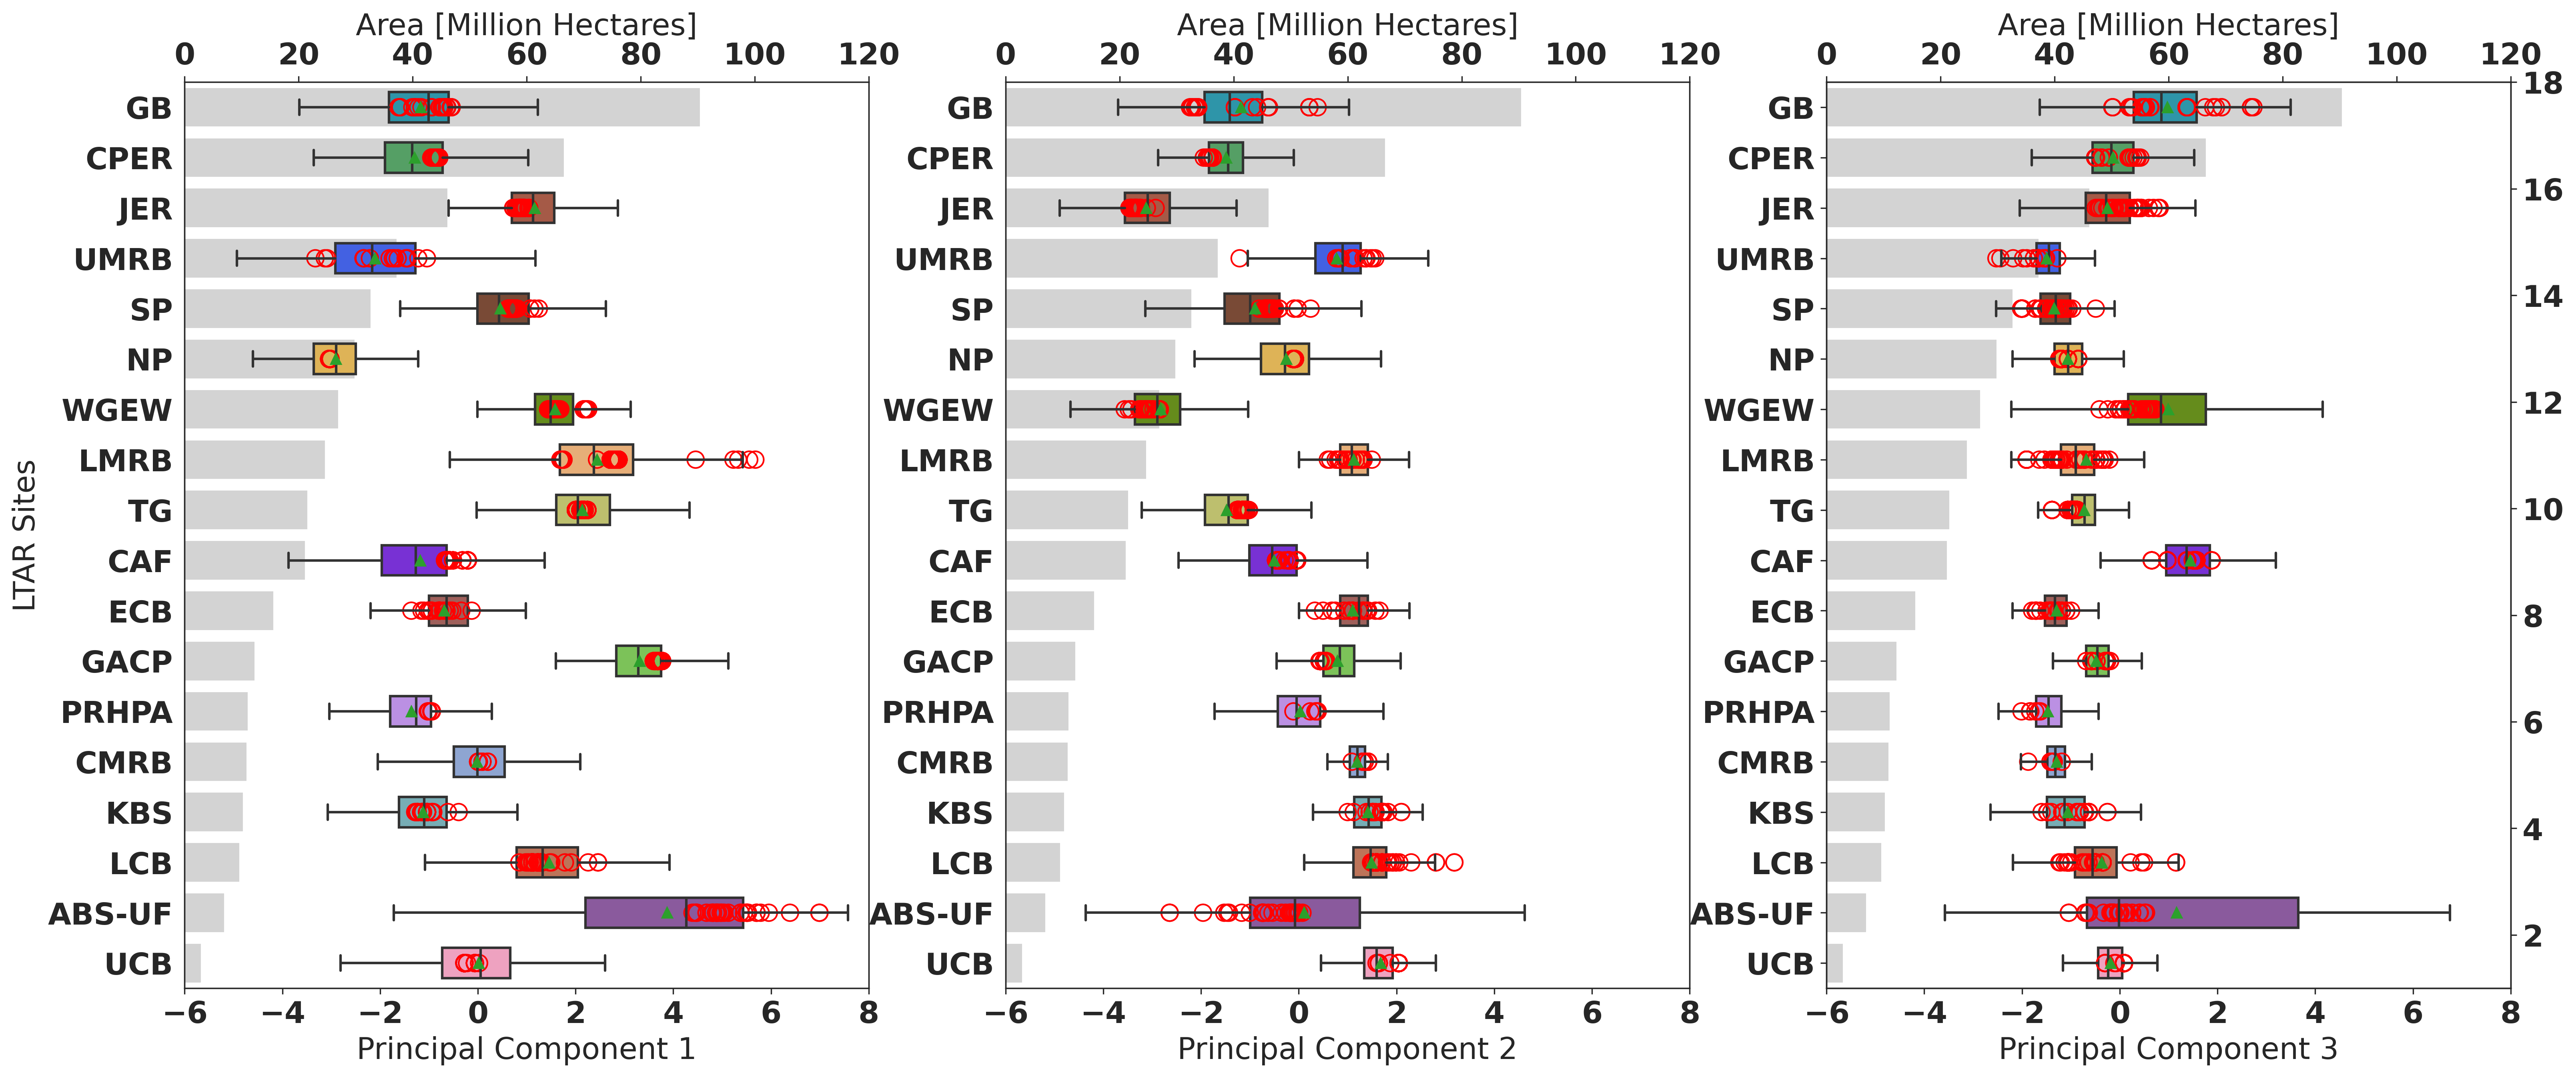

In [23]:
# Figure 7 
# Plot PC1,2,3 distrbutions across LTAR site constituencies

# create a figure object 
mfig, ax = plt.subplots(1,3, figsize=(25,10), dpi=300)
opfilename="ltar_v5_7pcs_pca_all_lands_boxplot.png"

##################
##################
#######################################################################################################
# workinglands 
# read univar data
univar_ltar_wl = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_workinglands.univar", delimiter="|")
# read the areas
area_ltar_wl = pd.read_csv("data/representativeness/ltar_v5_7pcs_workinglands.area", delimiter=",") #, header=None, names=['id', 'code', 'name', 'area'])
univar_ltar_wl['area'] = area_ltar_wl['area']

##################
##################

#######################################################################################################
# croplands 
# read univar data
univar_ltar_cl = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_croplands.univar", delimiter="|")
# read the areas
area_ltar_cl = pd.read_csv("data/representativeness/ltar_v5_7pcs_croplands.area", delimiter=",") #, header=None, names=['id', 'code', 'name', 'area'])
univar_ltar_cl['area'] = area_ltar_cl['area']
                                
ax2=ax[0].twiny()
ax2.set_ylabel("Area [Million Hectares]")
ax2.barh(univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'], univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['area']/(10000.0*1e6), color='lightgray')

sns.boxplot(y="ltar_const", x="pc1", data=ltar_data[ltar_data.masks > 0], width=.6, orient="h", fliersize=0, order=univar_ltar_wl.sort_values(by=['area'], ascending=False).index+1, showmeans=True, palette=ltar_colors.take(univar_ltar_wl.sort_values(by=['area'], ascending=False).index,0), ax=ax[0])

ax[0].set_xlabel("Principal Component 1")
ax2.set_xlabel("Area [Million Hectares]")
ax2.set_xlim([0,120])
ax[0].set_xlim([-6,8])
ax[0].set_ylabel("LTAR Sites")
ax[0].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'])
#ax[0].set_title("Croplands")
ax[0].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[0].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################

#######################################################################################################
# grazing lands 
# read univar data
univar_ltar_gl = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_grazinglands.univar", delimiter="|")
# read the areas
area_ltar_gl = pd.read_csv("data/representativeness/ltar_v5_7pcs_grazinglands.area") #, delimiter=",", header=None, names=['id', 'code', 'name', 'area'])
univar_ltar_gl['area'] = area_ltar_gl['area']
                                
ax2=ax[1].twiny()
ax2.set_ylabel("Area [Million Hectares]")
ax2.barh(univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'], univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['area']/(10000.0*1e6), color='lightgray')

sns.boxplot(y="ltar_const", x="pc2", data=ltar_data[ltar_data.masks > 0], width=.6, orient="h", fliersize=0, order=univar_ltar_wl.sort_values(by=['area'], ascending=False).index+1, showmeans=True, palette=ltar_colors.take(univar_ltar_wl.sort_values(by=['area'], ascending=False).index,0), ax=ax[1])

ax[1].set_xlabel("Principal Component 2")
ax2.set_xlabel("Area [Million Hectares]")
ax2.set_xlim([0,120])
ax[1].set_xlim([-6,8])
ax[1].set_ylabel("")
ax[1].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'])
#ax[1].set_title("Grazing lands")
ax[1].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[1].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################


#######################################################################################################
# Mixed use (cropland/grazingland) 
# read univar data
univar_ltar_is = pd.read_csv("data/representativeness/netrep_ltar_v5_7pcs_mixeduse.univar", delimiter="|")
# read the areas
area_ltar_is = pd.read_csv("data/representativeness/ltar_v5_7pcs_mixeduse.area", delimiter=",")
univar_ltar_is['area'] = area_ltar_is['area']
                                
ax2=ax[2].twiny()
ax2.set_ylabel("Area [Million Hectares]")
ax2.barh(univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'], univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['area']/(10000.0*1e6), color='lightgray')

## ORDER BY AREA
sns.boxplot(y="ltar_const", x="pc3", data=ltar_data[ltar_data.masks > 0], width=.6, orient="h", fliersize=0, order=univar_ltar_wl.sort_values(by=['area'], ascending=False).index+1, showmeans=True, palette=ltar_colors.take(univar_ltar_wl.sort_values(by=['area'], ascending=False).index,0), ax=ax[2])

ax[2].set_xlabel("Principal Component 3")
ax2.set_xlabel("Area [Million Hectares]")
ax2.set_xlim([0,120])
ax[2].set_xlim([-6,8])
ax[2].set_yticklabels(univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True)['code'])
ax[2].set_ylabel("")
#ax[2].set_title("Mixed use")
ax[2].set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax[2].patch.set_visible(False)  # prevents ax1 from hiding ax2
#########################################################################

#########################################################################
## Add experimental polygons as scatter
# read 6PCs data at LTAR sites
ltar_7pcs = pd.read_csv('data/pca/conus_ltar_v5_7pcs.vect.out', header=None, delimiter=" ", names=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
# we have 1529 centroids for 18 LTAR sites.. so read the LTAR site mapping
# cat1, cat2 are identical and experimental boundary number, ltar1 and ltar2 are associated ltar site number
ltar_site_mapping = pd.read_csv('data/ltar_10142020.recode', header=None, delimiter=':', names=["cat1", "cat2", "ltar1", "ltar2"])

# add experimental boundary and site ids to the pcs
ltar_7pcs['exp_bound'] = ltar_site_mapping['cat1']
ltar_7pcs['code'] = ltar_site_mapping['ltar1']

ax2y=ax[2].twinx()
# we will have to do this in a loop
for s in range(0,18):
    # find the site id from area sorted list 
    id = univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).zone.iloc[s]
   
    # plot this site data as scatter
    ax[0].scatter(y=len(ltar_7pcs[ltar_7pcs.code == id])*univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).code.iloc[s].split(), x=ltar_7pcs[ltar_7pcs.code == id]["PC1"], s=100, edgecolor="red", facecolor='none')
    ax[1].scatter(y=len(ltar_7pcs[ltar_7pcs.code == id])*univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).code.iloc[s].split(), x=ltar_7pcs[ltar_7pcs.code == id]["PC2"], s=100, edgecolor="red", facecolor='none')
    ax[2].scatter(y=len(ltar_7pcs[ltar_7pcs.code == id])*univar_ltar_wl.sort_values(by=['area'], ascending=False, ignore_index=True).code.iloc[s].split(), x=ltar_7pcs[ltar_7pcs.code == id]["PC3"], s=100, edgecolor="red", facecolor='none')
    
ax2y.set_ylim([1,18])
#########################################################################


plt.savefig(opfilename, transparent=False)


Text(0.5, 1.0, 'LTAR vs NEON vs LTER')

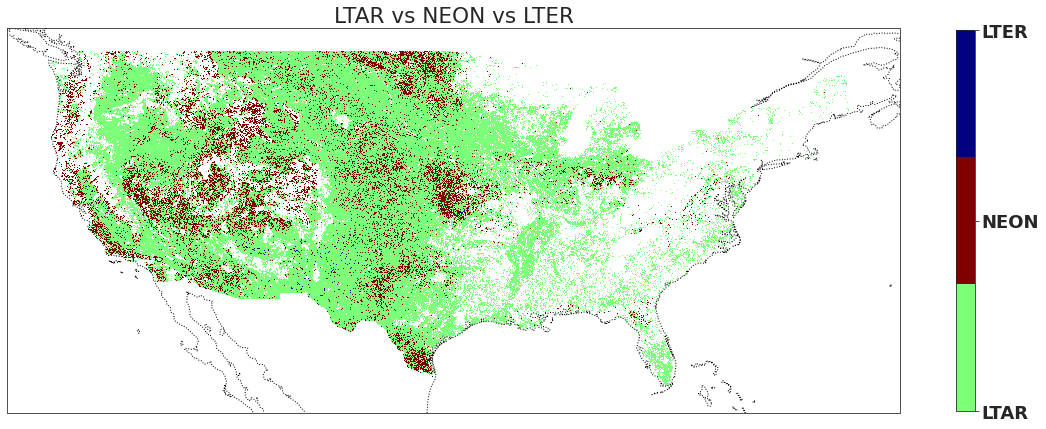

In [26]:
# Figure 8
# Best representing network among LTAR, NEON, LTER
# Read map: LTAR_vs_NEON_vs_LTER_v3_6pcs.tif
if path.isfile("data/representativeness/LTAR_NEON_LTER_bestnetwork_workinglands.tif"):
    networks3_map = rio.open_rasterio("data/representativeness/LTAR_NEON_LTER_bestnetwork_workinglands.tif", engine='rasterio', masked=True)
else:
    urllib.request.urlretrieve("https://zenodo.org/record/7106385/files/LTAR_NEON_LTER_bestnetwork_workinglands.tif", "data/representativeness/LTAR_NEON_LTER_bestnetwork_workinglands.tif")
    networks3_map = rio.open_rasterio("data/representativeness/LTAR_NEON_LTER_bestnetwork_workinglands.tif", engine='rasterio', masked=True)

######### COLORS ###############
vals = np.linspace(0,1,3)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))
################################

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
# Plot working lands only using working lands mask
n3=networks3_map.where(workingland_mask >=1).plot(cmap=cmap, vmax=1, vmin=3, add_colorbar=False)
ax.coastlines(color="black", linestyle="dotted")
cbar = plt.colorbar(n3, ticks=[1,2,3], shrink=0.7)
cbar.ax.set_yticklabels(network_code) 
plt.title("LTAR vs NEON vs LTER")

Text(0.5, 1.0, 'Combined LTAR + NEON + LTER Representativeness')

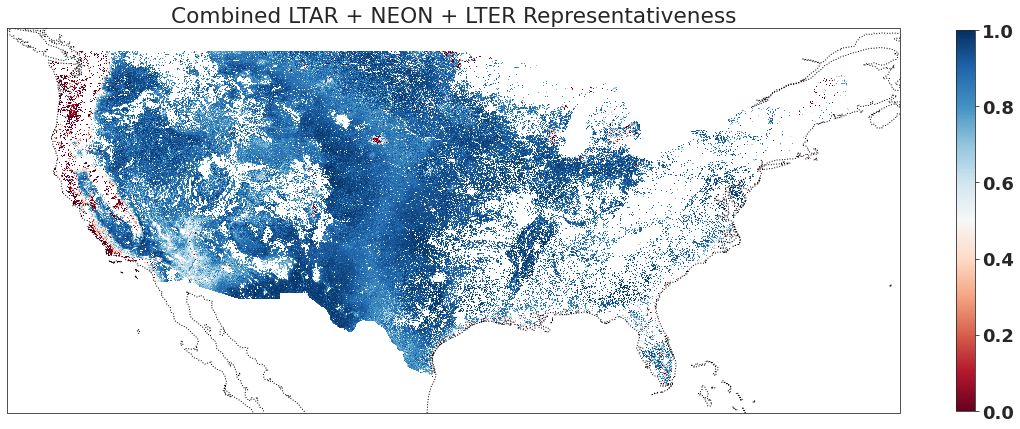

In [27]:
# Figure 9
# Normalized representativeness of combined LTAR, NEON, LTER network. Calculated for all lands
# Read representativeness map: LTAR_vs_NEON_vs_LTER_v3_6pcs_rep_norm.tif
if path.isfile("data/representativeness/LTAR_NEON_LTER_representativeness_workinglands.tif"):
    networks3_representativeness_map = rio.open_rasterio("data/representativeness/LTAR_NEON_LTER_representativeness_workinglands.tif", engine='rasterio', masked=True)
else:
    urllib.request.urlretrieve("https://zenodo.org/record/7106385/files/LTAR_NEON_LTER_representativeness_workinglands.tif", "data/representativeness/LTAR_NEON_LTER_representativeness_workinglands.tif")
    networks3_representativeness_map = rio.open_rasterio("data/representativeness/LTAR_NEON_LTER_representativeness_workinglands.tif", engine='rasterio', masked=True)

networks3_representativeness_map = rio.open_rasterio("data/representativeness/LTAR_NEON_LTER_representativeness_workinglands.tif", engine='rasterio', masked=True)

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
## Plot all lands
#r3=networks3_representativeness_map.plot(cmap='RdBu', vmax=0, vmin=1, add_colorbar=False)
# Plot only working lands based on working land mask
r3=networks3_representativeness_map.where(workingland_mask >=1).plot(cmap='RdBu', vmax=0, vmin=1, add_colorbar=False)
ax.coastlines(color="black", linestyle="dotted")
plt.colorbar(r3, shrink=0.7)
plt.title("Combined LTAR + NEON + LTER Representativeness")

In [2]:
ltar_data = pd.read_csv('data/representativeness/ltar_neon_lter_v5_7pcs_const_detailednomasks.out', header=None, names=['ltar_rep', 'ltar_neon_rep', 'ltar_neon_lter_rep', 'ltar_const', 'masks', 'pc1', 'pc2', 'pc3'])
ltar_data.to_pickle('data/representativeness/ltar_neon_lter_v5_7pcs_const_detailednomasks.pkl')